# Storytelling Data Visualization on Exchange Rates

## Dataset

In [5]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [6]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

This dataset has 41 columns and 6456 rows with none of them being null. Most columns are objects, but a few are floats.

## Data Cleaning
Next we will clean the data to make it easier to work with for the purposes examining the euro to US dollar exchange rate.

In [13]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'}, 
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: count, Length: 3769, dtype: int64

We can see `US_dollar` has 62 rows with a dash instead of a numeric value. Let's fix this.

In [14]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'].value_counts()

US_dollar
1.2276    9
1.1215    8
1.0888    7
1.0868    7
1.1305    7
         ..
1.4304    1
1.4350    1
1.4442    1
1.4389    1
1.0804    1
Name: count, Length: 3768, dtype: int64

In [20]:
euro_to_dollar.dtypes

Time         datetime64[ns]
US_dollar            object
dtype: object

`Us_dollar` also appears to be an object, so let's conver it to a float.

In [22]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.dtypes

Time         datetime64[ns]
US_dollar           float64
dtype: object

## Rolling Mean
Next, we will create a line plot to visualize how the euro to dollar exchange rate has changed over time.

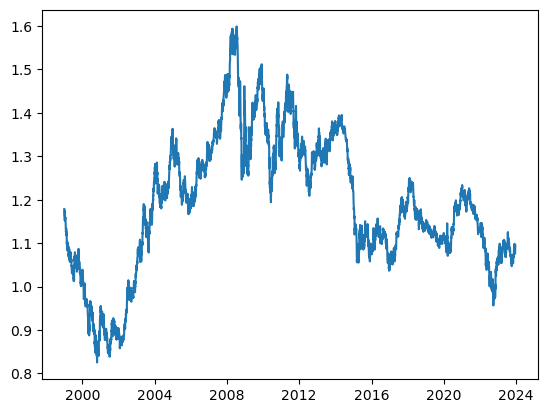

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

We can this graph is not very smooth. This is because the exchange rate changes each day, creating many variations over multiple years. This makes the graph unpleasant to look at and more difficult to read. We can solve this by using a rolling mean. This will simplifiy the graph, by taking the average of the values over set periods of time (i.e. the rolling window), leading to less data points and a smoother graph.

Let's see what the rolling mean looks like with a 7 day, 30 day, 50 day, 100 day, and 365 day rolling windows.

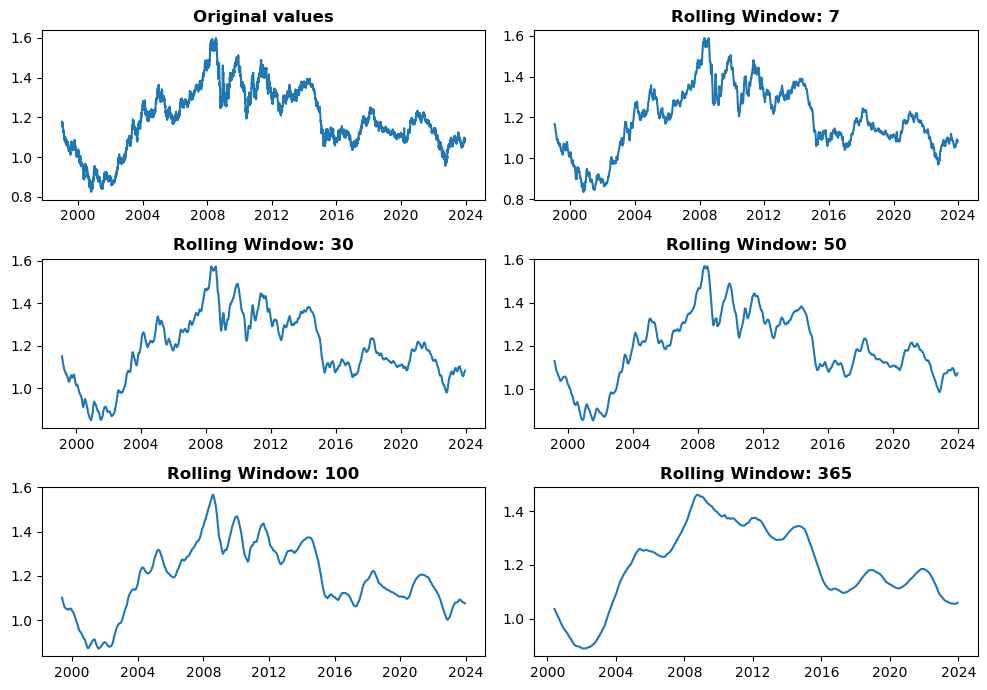

In [28]:
plt.figure(figsize=(10, 7))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'],
            euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window: ' + str(rolling_mean), weight='bold')

plt.tight_layout()
plt.show()